In [1]:
import pandas as pd
em = pd.read_csv('em_total.csv', encoding='utf-8-sig')
print('컬럼 목록:')
print(em.columns.tolist())
print('\n앞부분 5행:')
em.head()


컬럼 목록:
['광역', '지역명', '광역_지역명', '구분', '사업명', '연도', '온실가스 감축량(톤)', '예산(백만원)']

앞부분 5행:


,광역,지역명,광역_지역명,구분,사업명,연도,온실가스 감축량(톤),예산(백만원)
0,강원,춘천시,강원 춘천시,건물,가정용 저녹스보일러 설치 지원,2025.0,245,21.0
1,강원,춘천시,강원 춘천시,건물,가정용 저녹스보일러 설치 지원,2026.0,245,21.0
2,강원,춘천시,강원 춘천시,건물,가정용 저녹스보일러 설치 지원,2027.0,245,21.0
3,강원,춘천시,강원 춘천시,건물,가정용 저녹스보일러 설치 지원,2028.0,245,21.0
4,강원,춘천시,강원 춘천시,건물,가정용 저녹스보일러 설치 지원,2029.0,245,21.0


In [2]:
print('--- em 데이터프레임 정보 ---')
print('shape:', em.shape)
print('\ninfo:')
em.info()
print('\n기본 통계(describe):')
display(em.describe(include='all'))

--- em 데이터프레임 정보 ---
shape: (88073, 8)

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88073 entries, 0 to 88072
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   광역           80874 non-null  object 
 1   지역명          80874 non-null  object 
 2   광역_지역명       80874 non-null  object 
 3   구분           80874 non-null  object 
 4   사업명          80850 non-null  object 
 5   연도           80874 non-null  float64
 6   온실가스 감축량(톤)  80840 non-null  object 
 7   예산(백만원)      80854 non-null  object 
dtypes: float64(1), object(7)
memory usage: 5.4+ MB

기본 통계(describe):


,광역,지역명,광역_지역명,구분,사업명,연도,온실가스 감축량(톤),예산(백만원)
count,80874,80874,80874,80874,80850,80874.000000,80840,80854
unique,15,202,224,10,8673,NaN,13640,6183
top,경기,동구,경기 용인시,건물,노후경유차 조기폐차,NaN,0,0
freq,14808,2234,980,20570,199,NaN,12609,22487
mean,NaN,NaN,NaN,NaN,NaN,2028.430695,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.769838,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2025.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2026.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2028.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2030.000000,NaN,NaN


In [3]:
# '광역_지역명', '연도' 컬럼 삭제
em = em.drop(columns=['광역_지역명', '연도'])
print('컬럼 목록(갱신):')
print(em.columns.tolist())
print('\n앞부분 5행(갱신):')
em.head()

컬럼 목록(갱신):
['광역', '지역명', '구분', '사업명', '온실가스 감축량(톤)', '예산(백만원)']

앞부분 5행(갱신):


,광역,지역명,구분,사업명,온실가스 감축량(톤),예산(백만원)
0,강원,춘천시,건물,가정용 저녹스보일러 설치 지원,245,21.0
1,강원,춘천시,건물,가정용 저녹스보일러 설치 지원,245,21.0
2,강원,춘천시,건물,가정용 저녹스보일러 설치 지원,245,21.0
3,강원,춘천시,건물,가정용 저녹스보일러 설치 지원,245,21.0
4,강원,춘천시,건물,가정용 저녹스보일러 설치 지원,245,21.0


In [4]:
# 숫자 컬럼을 숫자형으로 변환 후 그룹 합계 계산
em['온실가스 감축량(톤)'] = pd.to_numeric(em['온실가스 감축량(톤)'], errors='coerce')
em['예산(백만원)'] = pd.to_numeric(em['예산(백만원)'], errors='coerce')

em_ag = em.groupby(['광역', '지역명', '구분', '사업명'], as_index=False)[['온실가스 감축량(톤)', '예산(백만원)']].sum()
print('em_ag 컬럼 목록:')
print(em_ag.columns.tolist())
print('\nem_ag 앞부분 5행:')
em_ag.head()

em_ag 컬럼 목록:
['광역', '지역명', '구분', '사업명', '온실가스 감축량(톤)', '예산(백만원)']

em_ag 앞부분 5행:


,광역,지역명,구분,사업명,온실가스 감축량(톤),예산(백만원)
0,강원,강릉시,건물,가로등 에너지효율화 사업,1040.0,200.0
1,강원,강릉시,건물,단독주택 도시가스 보급확대,2070.0,4800.0
2,강원,강릉시,건물,목재펠릿 보일러 보급,500.0,160.0
3,강원,강릉시,건물,읍면동 가로·보안등 조도개선 사업,1040.0,200.0
4,강원,강릉시,건물,저녹스 보일러 보급,160.0,0.0


In [5]:
print('--- em_ag 데이터프레임 정보 ---')
print('shape:', em_ag.shape)
print('\ninfo:')
em_ag.info()
print('\n기본 통계(describe):')
display(em_ag.describe(include='all'))

--- em_ag 데이터프레임 정보 ---
shape: (11576, 6)

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11576 entries, 0 to 11575
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   광역           11576 non-null  object 
 1   지역명          11576 non-null  object 
 2   구분           11576 non-null  object 
 3   사업명          11576 non-null  object 
 4   온실가스 감축량(톤)  11576 non-null  float64
 5   예산(백만원)      11576 non-null  float64
dtypes: float64(2), object(4)
memory usage: 542.8+ KB

기본 통계(describe):


,광역,지역명,구분,사업명,온실가스 감축량(톤),예산(백만원)
count,11576,11576,11576,11576,1.157600e+04,1.157600e+04
unique,15,202,10,8673,NaN,NaN
top,경기,동구,건물,숲가꾸기,NaN,NaN
freq,2158,320,2944,26,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.457298e+04,2.104489e+04
std,NaN,NaN,NaN,NaN,6.803706e+05,3.975132e+05
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,NaN,2.375000e+02,2.095000e+02
75%,NaN,NaN,NaN,NaN,2.790000e+03,1.859250e+03


In [6]:
# em_ag에서 합계 컬럼 이름 변경
em_ag = em_ag.rename(columns={
    '온실가스 감축량(톤)': '온실가스감축량_합계_톤',
    '예산(백만원)': '예산_합계_백만원'
})
print('변경 후 em_ag 컬럼 목록:')
print(em_ag.columns.tolist())
print('\nem_ag 앞부분 5행(컬럼명 변경 후):')
em_ag.head()

변경 후 em_ag 컬럼 목록:
['광역', '지역명', '구분', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']

em_ag 앞부분 5행(컬럼명 변경 후):


,광역,지역명,구분,사업명,온실가스감축량_합계_톤,예산_합계_백만원
0,강원,강릉시,건물,가로등 에너지효율화 사업,1040.0,200.0
1,강원,강릉시,건물,단독주택 도시가스 보급확대,2070.0,4800.0
2,강원,강릉시,건물,목재펠릿 보일러 보급,500.0,160.0
3,강원,강릉시,건물,읍면동 가로·보안등 조도개선 사업,1040.0,200.0
4,강원,강릉시,건물,저녹스 보일러 보급,160.0,0.0


In [7]:
# em_ag를 CSV로 저장
em_ag.to_csv('em_ag.csv', index=False, encoding='utf-8-sig')
'em_ag.csv 저장 완료'

'em_ag.csv 저장 완료'

In [8]:
# em_ag에서 구분이 '건물'인 것만 추출
em_building = em_ag[em_ag['구분'] == '건물'].copy()
print('em_building shape:', em_building.shape)
print('em_building 컬럼 목록:')
print(em_building.columns.tolist())
print('\nem_building 앞부분 5행:')
em_building.head()

em_building shape: (2944, 6)
em_building 컬럼 목록:
['광역', '지역명', '구분', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']

em_building 앞부분 5행:


,광역,지역명,구분,사업명,온실가스감축량_합계_톤,예산_합계_백만원
0,강원,강릉시,건물,가로등 에너지효율화 사업,1040.0,200.0
1,강원,강릉시,건물,단독주택 도시가스 보급확대,2070.0,4800.0
2,강원,강릉시,건물,목재펠릿 보일러 보급,500.0,160.0
3,강원,강릉시,건물,읍면동 가로·보안등 조도개선 사업,1040.0,200.0
4,강원,강릉시,건물,저녹스 보일러 보급,160.0,0.0


In [9]:
# em_ag에서 구분이 '수송'인 것만 추출
em_transport = em_ag[em_ag['구분'] == '수송'].copy()
print('em_transport shape:', em_transport.shape)
print('em_transport 컬럼 목록:')
print(em_transport.columns.tolist())
print('\nem_transport 앞부분 5행:')
em_transport.head()

em_transport shape: (2918, 6)
em_transport 컬럼 목록:
['광역', '지역명', '구분', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']

em_transport 앞부분 5행:


,광역,지역명,구분,사업명,온실가스감축량_합계_톤,예산_합계_백만원
12,강원,강릉시,수송,건설기계 저공해 조치,20.0,2090.0
13,강원,강릉시,수송,남대천 자전거도로 정비사업,0.0,6000.0
14,강원,강릉시,수송,수소전기자동차 보급사업,1288.0,27600.0
15,강원,강릉시,수송,운행차 저공해 조치,120.0,1570.0
16,강원,강릉시,수송,자동차 탄소포인트제 운영,5402.0,300.0


In [10]:
# em_transport를 CSV로 저장
em_transport.to_csv('em_transport.csv', index=False, encoding='utf-8-sig')
'em_transport.csv 저장 완료'

'em_transport.csv 저장 완료'

In [11]:
# em_building을 CSV로 저장
em_building.to_csv('em_building.csv', index=False, encoding='utf-8-sig')
'em_building.csv 저장 완료'

'em_building.csv 저장 완료'

In [12]:
from IPython.display import display
dfs = [('em_ag', em_ag), ('em_building', em_building), ('em_transport', em_transport)]
for name, df in dfs:
    print(f'--- {name} ---')
    print('shape:', df.shape)
    print('columns:', df.columns.tolist())
    print('\n앞부분 5행:')
    display(df.head())
    print('\n' + '='*60 + '\n')

--- em_ag ---
shape: (11576, 6)
columns: ['광역', '지역명', '구분', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']

앞부분 5행:


,광역,지역명,구분,사업명,온실가스감축량_합계_톤,예산_합계_백만원
0,강원,강릉시,건물,가로등 에너지효율화 사업,1040.0,200.0
1,강원,강릉시,건물,단독주택 도시가스 보급확대,2070.0,4800.0
2,강원,강릉시,건물,목재펠릿 보일러 보급,500.0,160.0
3,강원,강릉시,건물,읍면동 가로·보안등 조도개선 사업,1040.0,200.0
4,강원,강릉시,건물,저녹스 보일러 보급,160.0,0.0




--- em_building ---
shape: (2944, 6)
columns: ['광역', '지역명', '구분', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']

앞부분 5행:


,광역,지역명,구분,사업명,온실가스감축량_합계_톤,예산_합계_백만원
0,강원,강릉시,건물,가로등 에너지효율화 사업,1040.0,200.0
1,강원,강릉시,건물,단독주택 도시가스 보급확대,2070.0,4800.0
2,강원,강릉시,건물,목재펠릿 보일러 보급,500.0,160.0
3,강원,강릉시,건물,읍면동 가로·보안등 조도개선 사업,1040.0,200.0
4,강원,강릉시,건물,저녹스 보일러 보급,160.0,0.0




--- em_transport ---
shape: (2918, 6)
columns: ['광역', '지역명', '구분', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']

앞부분 5행:


,광역,지역명,구분,사업명,온실가스감축량_합계_톤,예산_합계_백만원
12,강원,강릉시,수송,건설기계 저공해 조치,20.0,2090.0
13,강원,강릉시,수송,남대천 자전거도로 정비사업,0.0,6000.0
14,강원,강릉시,수송,수소전기자동차 보급사업,1288.0,27600.0
15,강원,강릉시,수송,운행차 저공해 조치,120.0,1570.0
16,강원,강릉시,수송,자동차 탄소포인트제 운영,5402.0,300.0


In [13]:
# em_building에서 '그린 리모델링' 유사 사업명 필터링
사업명_str = em_building['사업명'].astype(str)

# 1) '그린'과 '리모델링'이 모두 포함된 경우
mask = 사업명_str.str.contains('그린', na=False) & 사업명_str.str.contains('리모델링', na=False)

# 2) 특정 키워드가 포함된 경우 제외
exclude_pattern = '공공|학교|국공립|어린이집|보건소|경로당|도서관'
mask = mask & ~사업명_str.str.contains(exclude_pattern, na=False)

# 3) 예산_합계_백만원 > 0, 온실가스감축량_합계_톤 > 0 인 경우만
mask = mask & (em_building['예산_합계_백만원'] > 0) & (em_building['온실가스감축량_합계_톤'] > 0)

em_building_green = em_building[mask].copy()
print('최종 선택된 행 수:', em_building_green.shape[0])
em_building_green.head(20)

최종 선택된 행 수: 35


,광역,지역명,구분,사업명,온실가스감축량_합계_톤,예산_합계_백만원
131,강원,삼척시,건물,녹색건축물 조성 보조금 지원사업 추진(그린리모델링),150.0,15000.0
873,경기,과천시,건물,민간건축물 그린 리모델링 지원(주택 패시브 리모델링 지원사업),95.0,250.0
1316,경기,동두천시,건물,도시재생뉴딜 연계 그린리모델링 활성화,185.0,84.0
2673,경기,하남시,건물,노후건축물 그린 리모델링 사업,2636.0,1200.0
2719,경기,화성시,건물,민간건축물 그린리모델링 지원,1658.0,2198.0
2825,경남,거제시,건물,그린리모델링 활성화,138.0,13207.0
3020,경남,밀양시,건물,주택 그린리모델링 지원사업,2257.0,45.0
3389,경남,창녕군,건물,보건지소 그린리모델링사업,48.0,1700.0
4100,경북,성주군,건물,그린리모델링(공동주택) 지원사업,143.0,5190.0
4584,경북,칠곡군,건물,빈집대상 그린리모델링 추진,197.0,1750.0


In [14]:
# em_building_green을 CSV로 저장
em_building_green.to_csv('em_building_green.csv', index=False, encoding='utf-8-sig')
'em_building_green.csv 저장 완료'

'em_building_green.csv 저장 완료'

In [15]:
# em_building에서 사업명 빈도 상위 15개 확인
top15_projects = em_building['사업명'].value_counts().head(15)
print('em_building 사업명 상위 15개 (빈도수):')
top15_projects

em_building 사업명 상위 15개 (빈도수):


사업명
도시가스 공급 확대         24
공공부문 온실가스 목표관리제    24
공공건축물 그린리모델링       16
도시가스 공급확대          15
탄소포인트제 운영          15
취약계층 에너지 복지사업      15
가로등 LED 교체         15
공공건축물 그린 리모델링      13
목재펠릿보일러 보급         11
탄소중립포인트제 운영        10
목재펠릿 보일러 보급         9
신축 건축물 ZEB 확대       8
공공기관 온실가스 목표관리제     8
가정용 저녹스 보일러 보급      8
LED 조명 교체           8
Name: count, dtype: int64

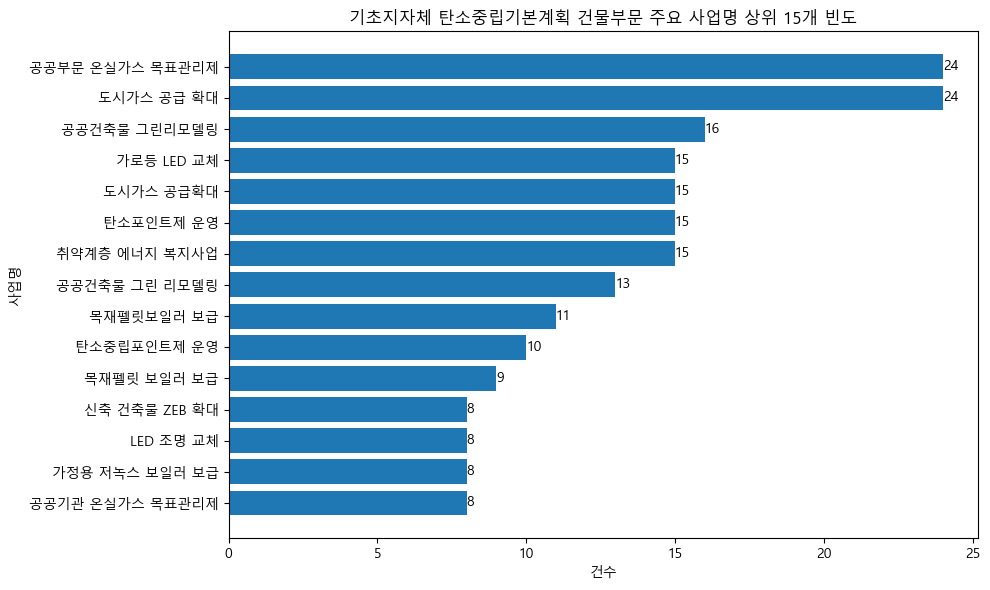

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 (윈도우 기준)
plt.rcParams['axes.unicode_minus'] = False
top15_sorted = top15_projects.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
bars = plt.barh(top15_sorted.index, top15_sorted.values)
for i, v in enumerate(top15_sorted.values):
    plt.text(v, i, str(v), va='center', ha='left')
plt.xlabel('건수')
plt.ylabel('사업명')
plt.title('기초지자체 탄소중립기본계획 건물부문 주요 사업명 상위 15개 빈도')
plt.tight_layout()
plt.show()

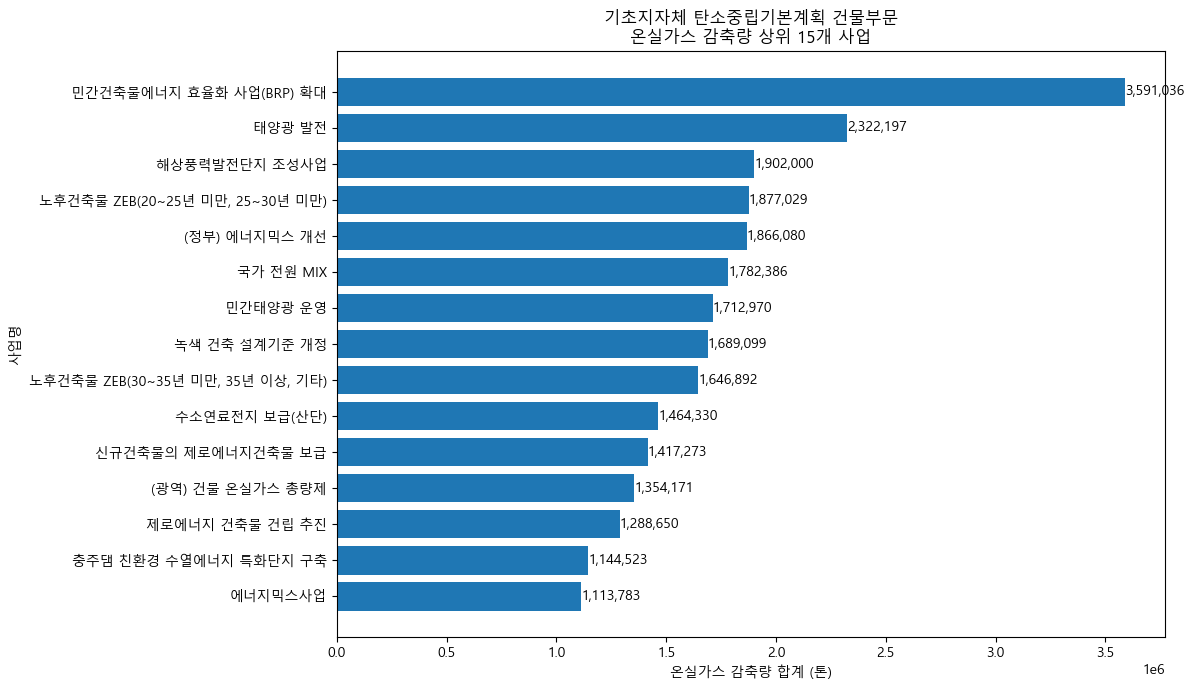

In [ ]:
# 상위 15개 사업명을 온실가스 감축량 기준 가로 막대그래프로 시각화 (사업명 통합 기준)
top15_plot = top15_emission.sort_values('온실가스감축량_합계_톤', ascending=True)
plt.figure(figsize=(12, 7))
bars = plt.barh(top15_plot['사업명_통합'], top15_plot['온실가스감축량_합계_톤'])
for i, v in enumerate(top15_plot['온실가스감축량_합계_톤']):
    plt.text(v, i, f'{v:,.0f}', va='center', ha='left')
plt.xlabel('온실가스 감축량 합계 (톤)')
plt.ylabel('사업명(통합)')
plt.title('기초지자체 탄소중립기본계획 건물부문\n온실가스 감축량 상위 15개 사업 (통합)')
plt.tight_layout()
plt.show()

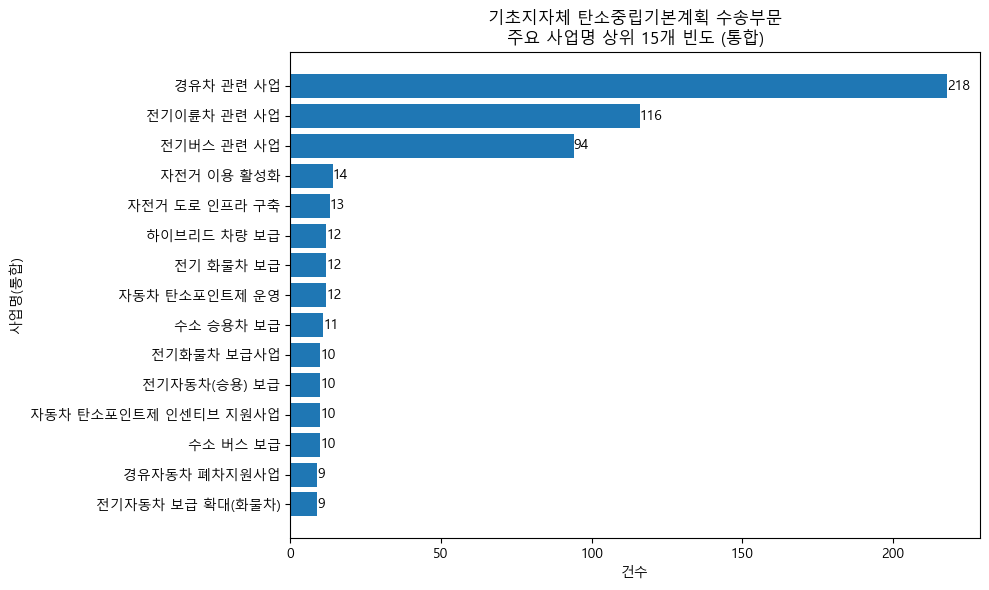

In [24]:
# em_transport에서 사업명 일부를 통합한 뒤 상위 15개를 가로 막대그래프로 시각화
사업명_str = em_transport['사업명'].astype(str)
em_transport['사업명_통합'] = 사업명_str

# 1) '경유차'가 들어간 사업명 통합
mask_diesel = 사업명_str.str.contains('경유차', na=False)
em_transport.loc[mask_diesel, '사업명_통합'] = '경유차 관련 사업'

# 2) '전기이륜차' 또는 '전기 이륜차'가 들어간 사업명 통합
mask_e_bike = 사업명_str.str.contains('전기이륜차', na=False) | 사업명_str.str.contains('전기 이륜차', na=False)
em_transport.loc[mask_e_bike, '사업명_통합'] = '전기이륜차 관련 사업'

# 3) '전기버스' 또는 '전기 버스'가 들어간 사업명 통합
mask_e_bus = 사업명_str.str.contains('전기버스', na=False) | 사업명_str.str.contains('전기 버스', na=False)
em_transport.loc[mask_e_bus, '사업명_통합'] = '전기버스 관련 사업'

# 통합된 사업명을 기준으로 상위 15개 빈도 계산
top15_transport_projects = em_transport['사업명_통합'].value_counts().head(15)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
top15_transport_sorted = top15_transport_projects.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
bars = plt.barh(top15_transport_sorted.index, top15_transport_sorted.values)
for i, v in enumerate(top15_transport_sorted.values):
    plt.text(v, i, str(v), va='center', ha='left')
plt.xlabel('건수')
plt.ylabel('사업명(통합)')
plt.title('기초지자체 탄소중립기본계획 수송부문\n주요 사업명 상위 15개 빈도 (통합)')
plt.tight_layout()
plt.show()

In [23]:
# em_transport에서 통합된 사업명 기준으로 빈도 상위 15개 확인
사업명_str = em_transport['사업명'].astype(str)
em_transport['사업명_통합'] = 사업명_str

mask_diesel = 사업명_str.str.contains('경유차', na=False)
em_transport.loc[mask_diesel, '사업명_통합'] = '경유차 관련 사업'

mask_e_bike = 사업명_str.str.contains('전기이륜차', na=False) | 사업명_str.str.contains('전기 이륜차', na=False)
em_transport.loc[mask_e_bike, '사업명_통합'] = '전기이륜차 관련 사업'

mask_e_bus = 사업명_str.str.contains('전기버스', na=False) | 사업명_str.str.contains('전기 버스', na=False)
em_transport.loc[mask_e_bus, '사업명_통합'] = '전기버스 관련 사업'

top15_transport_projects = em_transport['사업명_통합'].value_counts().head(15)
print('em_transport 통합 사업명 상위 15개 (빈도수):')
top15_transport_projects

em_transport 통합 사업명 상위 15개 (빈도수):


사업명_통합
경유차 관련 사업               218
전기이륜차 관련 사업             116
전기버스 관련 사업               94
자전거 이용 활성화               14
자전거 도로 인프라 구축            13
하이브리드 차량 보급              12
자동차 탄소포인트제 운영            12
전기 화물차 보급                12
수소 승용차 보급                11
자동차 탄소포인트제 인센티브 지원사업     10
수소 버스 보급                 10
전기자동차(승용) 보급             10
전기화물차 보급사업               10
전기자동차 보급 확대(화물차)          9
경유자동차 폐차지원사업              9
Name: count, dtype: int64

em_transport 사업명(통합)별 온실가스감축량_합계_톤 상위 15개:


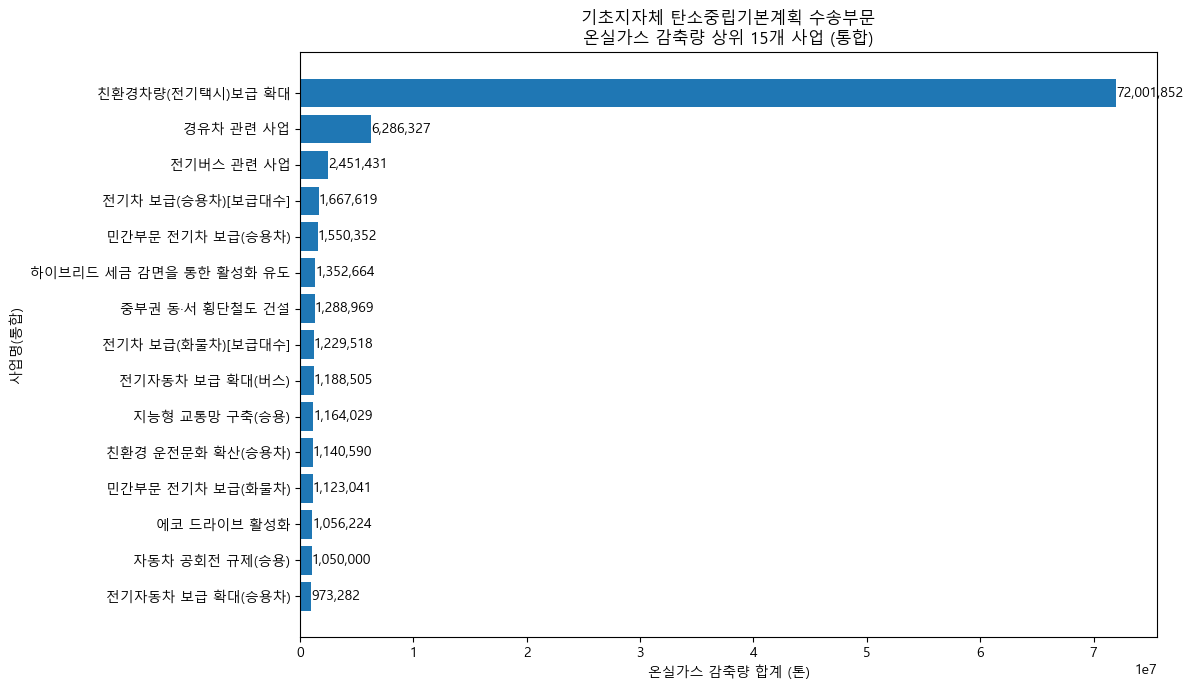

In [25]:
# em_transport에서 사업명(통합)별 온실가스감축량_합계_톤 상위 15개 (통합 기준)
사업명_str = em_transport['사업명'].astype(str)
em_transport['사업명_통합'] = 사업명_str

# 1) '경유차'가 들어간 사업명 통합
mask_diesel = 사업명_str.str.contains('경유차', na=False)
em_transport.loc[mask_diesel, '사업명_통합'] = '경유차 관련 사업'

# 2) '전기이륜차' 또는 '전기 이륜차'가 들어간 사업명 통합
mask_e_bike = 사업명_str.str.contains('전기이륜차', na=False) | 사업명_str.str.contains('전기 이륜차', na=False)
em_transport.loc[mask_e_bike, '사업명_통합'] = '전기이륜차 관련 사업'

# 3) '전기버스' 또는 '전기 버스'가 들어간 사업명 통합
mask_e_bus = 사업명_str.str.contains('전기버스', na=False) | 사업명_str.str.contains('전기 버스', na=False)
em_transport.loc[mask_e_bus, '사업명_통합'] = '전기버스 관련 사업'

# 통합된 사업명 기준으로 온실가스감축량_합계_톤 상위 15개 계산
top15_transport_emission = (em_transport
    .groupby('사업명_통합', as_index=False)['온실가스감축량_합계_톤']
    .sum()
    .sort_values('온실가스감축량_합계_톤', ascending=False)
    .head(15))
print('em_transport 사업명(통합)별 온실가스감축량_합계_톤 상위 15개:')
top15_transport_emission

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
top15_transport_emission_plot = top15_transport_emission.sort_values('온실가스감축량_합계_톤', ascending=True)
plt.figure(figsize=(12, 7))
bars = plt.barh(top15_transport_emission_plot['사업명_통합'], top15_transport_emission_plot['온실가스감축량_합계_톤'])
for i, v in enumerate(top15_transport_emission_plot['온실가스감축량_합계_톤']):
    plt.text(v, i, f'{v:,.0f}', va='center', ha='left')
plt.xlabel('온실가스 감축량 합계 (톤)')
plt.ylabel('사업명(통합)')
plt.title('기초지자체 탄소중립기본계획 수송부문\n온실가스 감축량 상위 15개 사업 (통합)')
plt.tight_layout()
plt.show()

In [31]:
# em_transport에서 '공공 자전거' 또는 '공공자전거' 관련 사업의 지역명, 사업명, 감축량, 예산 확인 및 저장
name_str = em_transport['사업명'].astype(str)
mask_public_bike = name_str.str.contains('공공 자전거', na=False) | name_str.str.contains('공공자전거', na=False)

# 조건에 해당하는 행만 선택 (광역, 지역명, 사업명, 온실가스감축량_합계_톤, 예산_합계_백만원)
public_bike_df = em_transport.loc[mask_public_bike, ['광역', '지역명', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']].copy()

# 지역명 목록도 함께 정리
regions_public_bike_sorted = sorted(public_bike_df['지역명'].dropna().unique())
print('공공자전거 관련 사업이 있는 지역명 수:', len(regions_public_bike_sorted))
print('지역명 목록:')
for r in regions_public_bike_sorted:
    print('-', r)

print('\n공공자전거 관련 사업 상세 (광역, 지역명, 사업명, 감축량, 예산):')
public_bike_df_sorted = public_bike_df.sort_values(['광역', '지역명', '사업명'])
display(public_bike_df_sorted)

# CSV로 저장
public_bike_df_sorted.to_csv('em_transport_bike.csv', index=False, encoding='utf-8-sig')
'em_transport_bike.csv 저장 완료'

공공자전거 관련 사업이 있는 지역명 수: 31
지역명 목록:
- 강북구
- 광명시
- 기장군
- 남원시
- 노원구
- 담양군
- 동구
- 동대문구
- 동작구
- 마포구
- 보령시
- 부천시
- 북구
- 서구
- 성동구
- 송파구
- 수영구
- 수원시
- 순천시
- 양산시
- 예천군
- 오산시
- 유성구
- 은평구
- 임실군
- 종로구
- 중구
- 중랑구
- 진주시
- 해남군
- 홍성군

공공자전거 관련 사업 상세 (광역, 지역명, 사업명, 감축량, 예산):


,광역,지역명,사업명,온실가스감축량_합계_톤,예산_합계_백만원
961,경기,광명시,공공자전거,4.0,770.0
1384,경기,부천시,공공자전거 대여소 및 자전거 재생센터 운영,21.0,100.0
1597,경기,수원시,공공자전거 이용,90.0,0.0
2172,경기,오산시,공공 자전거 대여,35.0,120.0
3199,경남,양산시,공공자전거 이용 활성화,18.0,0.0
3349,경남,진주시,공공자전거 보급,0.0,180.0
4367,경북,예천군,공공자전거 이용,175.0,4100.0
4825,광주,동구,공공자전거 보급 및 운영,9.0,2.0
4910,광주,서구,2-1. 공공자전거 무료 대여소 운영,12.0,100.0
5499,대전,유성구,공공자전거 이용 활성화,2236.0,0.0


'em_transport_bike.csv 저장 완료'

In [32]:
# em_transport에서 '대중교통' 또는 '대중 교통' 관련 사업의 지역명, 사업명, 감축량(배출량), 예산 확인 및 저장
name_str = em_transport['사업명'].astype(str)
mask_mass = name_str.str.contains('대중교통', na=False) | name_str.str.contains('대중 교통', na=False)

# 조건에 해당하는 행만 선택 (광역, 지역명, 사업명, 온실가스감축량_합계_톤, 예산_합계_백만원)
mass_df = em_transport.loc[mask_mass, ['광역', '지역명', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']].copy()

# 지역명 목록 정리
regions_mass_sorted = sorted(mass_df['지역명'].dropna().unique())
print('대중교통 관련 사업이 있는 지역명 수:', len(regions_mass_sorted))
print('지역명 목록:')
for r in regions_mass_sorted:
    print('-', r)

print('\n대중교통 관련 사업 상세 (광역, 지역명, 사업명, 감축량(톤), 예산(백만원)):')
mass_df_sorted = mass_df.sort_values(['광역', '지역명', '사업명'])
display(mass_df_sorted)

# CSV로 저장
mass_df_sorted.to_csv('em_transport_mass.csv', index=False, encoding='utf-8-sig')
'em_transport_mass.csv 저장 완료'

대중교통 관련 사업이 있는 지역명 수: 88
지역명 목록:
- 가평군
- 강동구
- 고령군
- 고성군
- 고양시
- 관악구
- 광명시
- 광산구
- 광주시
- 괴산군
- 구로구
- 구리시
- 구미시
- 군포시
- 금산군
- 김제시
- 김천시
- 김해시
- 나주시
- 남구
- 논산시
- 단양군
- 담양군
- 당진시
- 동구
- 동대문구
- 동두천시
- 동작구
- 마포구
- 무안군
- 보령시
- 보성군
- 봉화군
- 부안군
- 부천시
- 부평구
- 산청군
- 삼척시
- 상주시
- 성남시
- 성동구
- 수성구
- 수원시
- 순창군
- 순천시
- 신안군
- 안양시
- 양산시
- 여주시
- 연수구
- 연천군
- 영광군
- 영동군
- 영암군
- 영천시
- 예산군
- 예천군
- 오산시
- 옥천군
- 완도군
- 완주군
- 용인시
- 울릉군
- 원주시
- 유성구
- 의왕시
- 임실군
- 장성군
- 장흥군
- 정읍시
- 제천시
- 진안군
- 진천군
- 창원시
- 청송군
- 청양군
- 청주시
- 춘천시
- 칠곡군
- 태안군
- 통영시
- 함양군
- 함평군
- 해남군
- 홍성군
- 홍천군
- 화성시
- 화순군

대중교통 관련 사업 상세 (광역, 지역명, 사업명, 감축량(톤), 예산(백만원)):


,광역,지역명,사업명,온실가스감축량_합계_톤,예산_합계_백만원
159,강원,삼척시,대중교통 활성화,8141.0,2750.0
340,강원,원주시,대중교통비 환급 지원 사업(K-패스),31.4,10500.0
487,강원,춘천시,대중교통 이용 활성화,17160.0,14422.0
597,강원,홍천군,대중교통 활성화 사업 (교통카드 할인 손실보장),9710.0,810.0
598,강원,홍천군,대중교통 활성화 사업 (알뜰교통카드 마일리지 플러스),9710.0,13.0
...,...,...,...,...,...
11310,충북,제천시,대중교통비 환급 지원(K-패스) 사업,10.0,530.0
11407,충북,진천군,대중교통 이용 확대,182.0,51874.0
11417,충북,진천군,진천군 무료 대중교통 서비스 제공,0.0,10000.0
11479,충북,청주시,대중교통 활성화를 위한 시민혜택 홍보강화,0.0,1000.0


'em_transport_mass.csv 저장 완료'

In [34]:
# em_transport에서 '수리'가 들어가는 사업의 지역명, 사업명, 감축량, 예산 확인 및 저장
name_str = em_transport['사업명'].astype(str)
mask_repair = name_str.str.contains('수리', na=False)

# 조건에 해당하는 행만 선택 (광역, 지역명, 사업명, 온실가스감축량_합계_톤, 예산_합계_백만원)
repair_df = em_transport.loc[mask_repair, ['광역', '지역명', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']].copy()

# 지역명 목록 정리
regions_repair_sorted = sorted(repair_df['지역명'].dropna().unique())
print("'수리'가 들어간 사업이 있는 지역명 수:", len(regions_repair_sorted))
print('지역명 목록:')
for r in regions_repair_sorted:
    print('-', r)

print("\n'수리'가 들어간 사업 상세 (광역, 지역명, 사업명, 감축량(톤), 예산(백만원)):")
repair_df_sorted = repair_df.sort_values(['광역', '지역명', '사업명'])
display(repair_df_sorted)

# CSV로 저장
repair_df_sorted.to_csv('em_transport_repair.csv', index=False, encoding='utf-8-sig')
'em_transport_repair.csv 저장 완료'

'수리'가 들어간 사업이 있는 지역명 수: 6
지역명 목록:
- 강남구
- 강동구
- 고양시
- 노원구
- 달서구
- 동작구

'수리'가 들어간 사업 상세 (광역, 지역명, 사업명, 감축량(톤), 예산(백만원)):


,광역,지역명,사업명,온실가스감축량_합계_톤,예산_합계_백만원
822,경기,고양시,찾아가는 자전거 수리 판매센터,0.0,0.0
5046,대구,달서구,순회 자전거 수리 서비스 실시,0.0,12.0
6449,서울,강남구,자전거 무상수리 센터 운영,0.0,3500.0
6500,서울,강동구,자전거수리센터 운영,0.0,2245.0
6904,서울,노원구,자전거 수리 바우처 지급,0.0,875.0
7068,서울,동작구,자전거도로 및 자전거이용시설 점검·정비로\n \n 이용 활성화 (무상수리센터 운영),0.0,114.0


'em_transport_repair.csv 저장 완료'

In [35]:
# em_building에서 '화석'이 들어간 사업의 지역명, 사업명, 감축량, 예산 확인
name_str_building = em_building['사업명'].astype(str)
mask_fossil = name_str_building.str.contains('화석', na=False)

# 조건에 해당하는 행만 선택 (광역, 지역명, 사업명, 온실가스감축량_합계_톤, 예산_합계_백만원)
fossil_df = em_building.loc[mask_fossil, ['광역', '지역명', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']].copy()

# 지역명 목록 정리
regions_fossil_sorted = sorted(fossil_df['지역명'].dropna().unique())
print("'화석'이 들어간 사업이 있는 지역명 수:", len(regions_fossil_sorted))
print('지역명 목록:')
for r in regions_fossil_sorted:
    print('-', r)

print("\n'화석'이 들어간 사업 상세 (광역, 지역명, 사업명, 감축량(톤), 예산(백만원)):")
fossil_df_sorted = fossil_df.sort_values(['광역', '지역명', '사업명'])
display(fossil_df_sorted)

'화석'이 들어간 사업이 있는 지역명 수: 3
지역명 목록:
- 거제시
- 동작구
- 서천군

'화석'이 들어간 사업 상세 (광역, 지역명, 사업명, 감축량(톤), 예산(백만원)):


,광역,지역명,사업명,온실가스감축량_합계_톤,예산_합계_백만원
2827,경남,거제시,신축건물 화석연료 사용 제한,0.0,0.0
7055,서울,동작구,히트펌프 도입을 통한\n \n 화석연료 사용시설 전기화,40465.0,36372.0
10713,충남,서천군,화석연료 필요없는 에너지 자립섬(유부도) 조성,20361.0,300.0


In [37]:
# em_building에서 '히트펌프'가 들어간 사업의 지역명, 사업명, 감축량, 예산 확인 및 CSV 저장
name_str_building = em_building['사업명'].astype(str)
mask_heatpump = name_str_building.str.contains('히트펌프', na=False)

# 조건에 해당하는 행만 선택 (광역, 지역명, 사업명, 온실가스감축량_합계_톤, 예산_합계_백만원)
heatpump_df = em_building.loc[mask_heatpump, ['광역', '지역명', '사업명', '온실가스감축량_합계_톤', '예산_합계_백만원']].copy()

# 지역명 목록 정리
regions_heatpump_sorted = sorted(heatpump_df['지역명'].dropna().unique())
print("'히트펌프'가 들어간 사업이 있는 지역명 수:", len(regions_heatpump_sorted))
print('지역명 목록:')
for r in regions_heatpump_sorted:
    print('-', r)

print("\n'히트펌프'가 들어간 사업 상세 (광역, 지역명, 사업명, 감축량(톤), 예산(백만원)):")
heatpump_df_sorted = heatpump_df.sort_values(['광역', '지역명', '사업명'])
display(heatpump_df_sorted)

# CSV로 저장
heatpump_df_sorted.to_csv('em_building_heatpump.csv', index=False, encoding='utf-8-sig')
'em_building_heatpump.csv 저장 완료'

'히트펌프'가 들어간 사업이 있는 지역명 수: 8
지역명 목록:
- 강남구
- 관악구
- 동작구
- 순천시
- 의성군
- 중구
- 증평군
- 태안군

'히트펌프'가 들어간 사업 상세 (광역, 지역명, 사업명, 감축량(톤), 예산(백만원)):


,광역,지역명,사업명,온실가스감축량_합계_톤,예산_합계_백만원
4472,경북,의성군,청소년센터 수영장 히트펌프 설치,628.0,190.0
5552,대전,중구,전기히트펌프 교체,57.0,292.0
6430,서울,강남구,히트펌프 도입,6543.0,5880.0
6635,서울,관악구,히트펌프 설치(기름 보일러),584.0,0.0
6636,서울,관악구,히트펌프 설치(도시가스 보일러),393.0,0.0
6637,서울,관악구,히트펌프 설치(전기히터 보일러),383.0,0.0
7055,서울,동작구,히트펌프 도입을 통한\n \n 화석연료 사용시설 전기화,40465.0,36372.0
8986,전남,순천시,기존건축물 그린리모델링 사업(전기히트펌프),0.0,1363.0
10970,충남,태안군,친환경에너지 (히트펌프) 보급,3765.0,27000.0
11353,충북,증평군,히트펌프 설치,276.0,300.0


'em_building_heatpump.csv 저장 완료'